# D(z) using the standard model and nonlocal gravity

In [ ]:
using Plots
using Colors
using LinearAlgebra

Listing the Parameters

In [ ]:
#parameters

#General Params
G = 6.67 * 10^(-11) 
Omega_m = 0.317
Omega_l = 1 - Omega_m

#ΛCDM_Params
H0_CDM = 67.4
h_CDM = 0.674
deltaH0_CDM = 0.5
OmegaBh2_CDM = 0.0224
deltaOmegeBh2_CDM = 0.0001
OmegaCh2_CDM = 0.12
deltaOmegaCh2_CDM = 0.001
wB_CDM = 0
wC_CDM = 0
wLambda_CDM = -1.03
deltawLambda_CDM = 0.03

#Nonlocal Params
alpha_s = 0.0034
#alpha_s = 0.0
beta_s = -1.0
H0 = 68.42
h = 0.6842
deltaH0 = 0.5
OmegaBh2 = 0.02217
deltaOmegeBh2 = 0.0001
OmegaCh2 = 0.1176
deltaOmegaCh2 = 0.001
wB = 0
w = 0 #CDM
wC = 0
wlambda = -1.0
dP_dRho = 0
deltawLambda = 0.03


## Standard Model <br>
---

In [ ]:
tilde_Omega_m(a) = Omega_m / (Omega_m + Omega_l * a^3)
function Euler(j, D00, D10)
    f1(a, k) = -3 / a * (1 - 0.5 * tilde_Omega_m(a))
    f2(a, k) =  3 / 2 * tilde_Omega_m(a) * a^(-2)
    D2(a, k, D1, D0) = f1(a, k) * D1 + f2(a, k) * D0
    steps = 0.99 * 10^j
    h =  1 / 10^j
    D0s = Float64[D00]
    D1s = Float64[D10]
    a = Float64[0.01]
    for i in 1:Int(steps)
        push!(a, 0.01 + i * h)
        push!(D1s, D1s[i] + D2(a[i], 0, D1s[i], D0s[i]) * h)
        push!(D0s, D0s[i] + D1s[i] * h)
    end
    #a = 1 ./ a .- 1
    D0a = D0s ./ a 
plot(a, D0a, xlabel = "a", ylabel = "D(a)", title = "Density contrast based on a (ΛCDM)", lw = 2 , xaxis = :log)
end

In [ ]:
Euler(5, 0.01, 1)

In [19]:
tilde_Omega_mz(z) = Omega_m / (Omega_m + Omega_l * (1 + z) ^ (-3))
function Eulerz(j, D00, D10)
    f1(z, k) = (1 - 1.5 * tilde_Omega_mz(z)) / (1 + z)
    f2(z, k) =  3 / 2 * tilde_Omega_mz(z) * (1 + z)^(-2)
    D2(z, k, D1, D0) = f1(z, k) * D1 + f2(z, k) * D0
    steps = 100 * 10^j
    h =  -1 / 10^j
    D0s = Float64[D00]
    D1s = Float64[D10]
    z = Float64[100]
    for i in 1:Int(steps)
        push!(z,  100 + i * h)
        push!(D1s, D1s[i] + D2(z[i], 0, D1s[i], D0s[i]) * h)
        push!(D0s, D0s[i] + D1s[i] * h)
    end
    D0s = D0s ./ D0s[steps]
    plot(z, D0s, xlabel = "z", ylabel = "D(z)", title = "Density contrast based on z (ΛCDM)", lw = 2)
end

Eulerz (generic function with 1 method)

In [ ]:
Eulerz(4, 1 / 101, -1 / (101)^2)

## Nonlocal Gravity
---

In [ ]:
#Nonlocal theory functions
Gamma(z) = (1 + S(0)) / (1 + S(z))

Gamma_prime_z(z) = - Sprime_z(z) * (1 + S(0)) / (1 + S(z)) ^ 2

H_nonlocal(z) = H0 * Gamma(z) * sqrt(OmegaBh2 / h^2 / (1 + S(0)) * (1 + z) ^ (3 * (1 + wB)) + OmegaCh2 / h^2 / (1 + S(0)) * (1 + z) ^(3 * (1 + wC)) + (1 - (OmegaBh2 + OmegaCh2) / h^2 / (1 + S(0))) * (1 + z) ^ (3 * (1 + wlambda)))

H_nl(z) = 1 / (1 + z) * H_nonlocal(z)

H_nonlocal_prime_z(z) = H_nonlocal(z) * ((OmegaBh2 / h^2 / (1 + S(0)) * (3 * (1 + wB)) * (1 + z) ^ (3 * (1 + wB) - 1) + OmegaCh2 / h^2 / (1 + S(0)) * (3 * (1 + wC)) * (1 + z) ^(3 * (1 + wC) - 1) + (1 - (OmegaBh2 + OmegaCh2) / h^2 / (1 + S(0))) * (3 * (1 + wlambda)) * (1 + z) ^ (3 * (1 + wlambda) - 1)) / 2 / (OmegaBh2 / h^2 / (1 + S(0)) * (1 + z) ^ (3 * (1 + wB)) + OmegaCh2 / h^2 / (1 + S(0)) * (1 + z) ^(3 * (1 + wC)) + (1 - (OmegaBh2 + OmegaCh2) / h^2 / (1 + S(0))) * (1 + z) ^ (3 * (1 + wlambda))) + Gamma_prime_z(z) / Gamma(z))

S(z) = alpha_s * (1 + z) ^ beta_s

Sprime_z(z) = alpha_s * beta_s * (1 + z) ^ (beta_s - 1)

Ssecond_z(z) = alpha_s * beta_s * (beta_s - 1) * (1 + z) ^ (beta_s - 2)

beta(z) = - H_nonlocal(z) * Sprime_z(z) / (1 + S(z))

betaprime(z) = H_nonlocal_prime_z(z) * H_nonlocal(z) * Sprime_z(z) / (1 + S(z)) + H_nonlocal(z) ^ 2 * Ssecond_z(z) / (1 + S(z)) - beta(z) ^ 2

gothic_R(z, k) = 2 * k^2 - 3 * beta(z) * H_nl(z)

A1(z, k) = - (18 * (1 + w) * H_nl(z)^3 + 4 * k^2 * beta(z) + 3 * H_nl(z)^2 * (7 - 3 * w - 6 * dP_dRho) * beta(z) + 12 * k^2 * H_nl(z) * (w - dP_dRho) - 6 * H_nl(z) * betaprime(z)) / (2 * (1 + S(z)) * gothic_R(z, k))

A2(z, k) = -1 / (1 + z) * (-4 * k^4 + 54 * (1 + w) * H_nl(z)^4 + 12 * H_nl(z) * beta(z) * (2 * k^2 + 3 * H_nl(z)^2) + 9 * H_nl(z)^2 * (2 * k^2 * (1 + w) - beta(z)^2 - 2 * betaprime(z))) / (2 * k^2 * (1 + S(z)) * gothic_R(z, k) * (1 + 2)^(-1))

B1(z, k) = - (2 + 3 * w) * H_nl(z) - beta(z) + (3 * H_nl(z) * (2 * k^2 + 3 * (1 + w) * H_nl(z)^2)) / gothic_R(z, k)

B2(z, k) = k^2 * (-2 * k^2 * dP_dRho + 3 * (1 + w) * H_nl(z)^2 + 3 * (1 + dP_dRho) * beta(z) * H_nl(z)) / ((1 + w) * gothic_R(z, k))

In [27]:
function nonlocal_delta_plot(k_dimless)
    j = 2
    k = k_dimless * H_nonlocal(0)
    steps = 100 * 10^j
    steplen =  -1 / 10^j
    delta_init = 1 / (101)
    deltaprime_init = -1 / (101)^2
    theta_init = (deltaprime_init / H_nonlocal(100) - A1(100, k) * delta_init) / A2(100, k)
    #thetaprime_init = - B1(100, k) * theta_init - B2(100, k) * delta_init
    thetaz = Float64[theta_init]
    #thetaprimez = Float64[thetaprime_init]
    deltaz = Float64[delta_init]
    deltaprimez = Float64[deltaprime_init]
    Z = Float64[100]
    thetaprime(z, k, theta, delta) =  (B1(z, k) * theta + B2(z, k) * delta) / H_nonlocal(z)
    deltaprime(z, k, theta, delta) =  (A1(z, k) * delta + A2(z, k) * theta) / H_nonlocal(z)
    for i in 1:Int(steps)
        push!(Z,  100 + i * steplen)
        push!(deltaz, deltaz[i] + deltaprime(Z[i], k, thetaz[i], deltaz[i]) * steplen)
        push!(thetaz, thetaz[i] + thetaprime(Z[i], k, thetaz[i], deltaz[i]) * steplen)
    end
    deltaz = deltaz ./ deltaz[steps] 
    plot!(Z, deltaz, xlabel = "z", ylabel = "δ(z)", lw = 2, label = "k = $k_dimless")
end

nonlocal_delta_plot (generic function with 1 method)

In [ ]:
Eulerz(4, 1 / 101, -1 / (101)^2)
nonlocal_delta_plot(20.0)
nonlocal_delta_plot(7.0)
nonlocal_delta_plot(6.0)

In [ ]:
nonlocal_delta_plot(20.0)

In [ ]:
H_Times_a_Nonlocal(z) =  1 / (1+z) * H0 * Gamma(z) * sqrt(OmegaBh2 / h^2 / (1 + S(0)) * (1 + z) ^ (3 * (1 + wB)) + OmegaCh2 / h^2 / (1 + S(0)) * (1 + z) ^(3 * (1 + wC)) + (1 - (OmegaBh2 + OmegaCh2) / h^2 / (1 + S(0))) * (1 + z) ^ (3 * (1 + wlambda)))
H_Times_a_Standard(z) = H0_CDM * sqrt(Omega_m * (1 + z)^(3) + Omega_l) / (1 + z)
H_nonlocal_tester(z) = H0 * Gamma(z) * sqrt(OmegaBh2 / h^2 / (1 + S(0)) * (1 + z) ^ (3 * (1 + wB)) + OmegaCh2 / h^2 / (1 + S(0)) * (1 + z) ^(3 * (1 + wC)) + (1 - (OmegaBh2 + OmegaCh2) / h^2 / (1 + S(0))) * (1 + z) ^ (3 * (1 + wlambda)))
H_standard_tester(z) = H0_CDM * sqrt(Omega_m * (1 + z)^(3) + Omega_l)
plot(H_Times_a_Nonlocal, title = "aH(z) based on z", label = "nonlocal", xlabel = "z", ylabel = "aH(z)", xlims = (0, 100))#, xaxis = :log, yaxis = :log)
plot!(H_Times_a_Standard, label = "standard")
#plot(H_nonlocal_tester, title = "H(z) based on z", label = "nonlocal", xlabel = "z", ylabel = "H(z)", xlims = (0,10))#, xaxis = :log, yaxis = :log)
#plot!(H_standard_tester, label = "standard")

In [23]:
A1_ALT(z,k) = -9/2 / (1 + z)^2 / k^2 * H_nonlocal(z) ^ 2
A2_ALT(z,k) = -1/(1 + z) / H_nonlocal(z) * (-1 + 27/2 * (H_nonlocal(z) / k / (1 + z))^4 + 9 / 2 * (H_nonlocal(z) / k / (1 + z))^2)
B1_ALT(z,k) = (1 / (1 + z) + 9 / 2 / (1 + z)^3 * H_nonlocal(z) ^ 2 / k^2)
B2_ALT(z,k) = 3 / 2 / (1 + z)^2 * H_nonlocal(z)
function nonlocal_delta_plot_ALT(k_dimless)
    j = 3
    k = k_dimless * H_nonlocal(0)
    steps = 100 * 10^j
    steplen =  -1 / 10^j
    delta_init = 1 / (101)
    deltaprime_init = -1 / (101)^2
    theta_init = (deltaprime_init / H_nonlocal(100) - A1(100, k) * delta_init) / A2(100, k)
    #thetaprime_init = - B1(100, k) * theta_init - B2(100, k) * delta_init
    thetaz = Float64[theta_init]
    #thetaprimez = Float64[thetaprime_init]
    deltaz = Float64[delta_init]
    deltaprimez = Float64[deltaprime_init]
    Z = Float64[100]
    thetaprime(z, k, theta, delta) =  -(B1_ALT(z, k) * theta + B2_ALT(z, k) * delta)
    deltaprime(z, k, theta, delta) =  -(A1_ALT(z, k) * delta + A2_ALT(z, k) * theta) 
    for i in 1:Int(steps)
        push!(Z,  100 + i * steplen)
        push!(deltaz, deltaz[i] + deltaprime(Z[i], k, thetaz[i], deltaz[i]) * steplen)
        push!(thetaz, thetaz[i] + thetaprime(Z[i], k, thetaz[i], deltaz[i]) * steplen)
    end
    deltaz = deltaz ./ deltaz[steps]
    plot!(Z, deltaz, xlabel = "z", ylabel = "δ(z)", lw = 2, label = "k = $k_dimless")
end

nonlocal_delta_plot_ALT (generic function with 1 method)

In [ ]:
Eulerz(4, 1 / 101, -1 / (101)^2)
nonlocal_delta_plot_ALT(20.0)
nonlocal_delta_plot_ALT(7.0)
nonlocal_delta_plot_ALT(6.0)

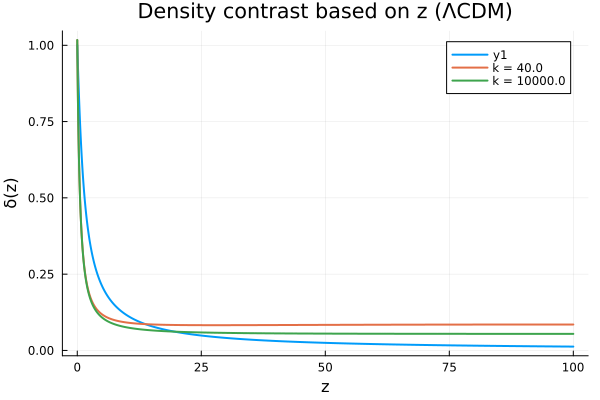

In [29]:
Eulerz(3, 1 / 101, -1 / (101)^2)
nonlocal_delta_plot(40.0)
nonlocal_delta_plot(10000.0)

In [32]:
function nonlocal_delta(k_dimless, Zref)
    j = 2
    k = k_dimless * H_nonlocal(0)
    steps = 100 * 10^j
    steplen =  -1 / 10^j
    delta_init = 1 / (101)
    deltaprime_init = -1 / (101)^2
    theta_init = (deltaprime_init / H_nonlocal(100) - A1(100, k) * delta_init) / A2(100, k)
    #thetaprime_init = - B1(100, k) * theta_init - B2(100, k) * delta_init
    thetaz = Float64[theta_init]
    #thetaprimez = Float64[thetaprime_init]
    deltaz = Float64[delta_init]
    deltaprimez = Float64[deltaprime_init]
    Z = Float64[100]
    thetaprime(z, k, theta, delta) =  (B1(z, k) * theta + B2(z, k) * delta) / H_nonlocal(z)
    deltaprime(z, k, theta, delta) =  (A1(z, k) * delta + A2(z, k) * theta) / H_nonlocal(z)
    for i in 1:Int(steps)
        push!(Z,  100 + i * steplen)
        push!(deltaz, deltaz[i] + deltaprime(Z[i], k, thetaz[i], deltaz[i]) * steplen)
        push!(thetaz, thetaz[i] + thetaprime(Z[i], k, thetaz[i], deltaz[i]) * steplen)
    end
    deltaz = deltaz ./ deltaz[steps] 
    index = floor(Int, 10^j * (100 - Zref))
    return deltaz[index]
end

nonlocal_delta (generic function with 1 method)

In [ ]:
Dz_Arr = []
K_Arr = []
Zs = [0.0, 0.1, 1, 10, 30]
Zlabels = ["z = 0" "z = 0.1" "z = 1" "z = 10" "z=30"]
data_count = 10
kup = 1000
kdown = 30
for i in 1:data_count
    push!(K_Arr, i * (kup - kdown) / data_count + kdown)
end
for z_ref in Zs
    Z_results = []
    for k_ref in K_Arr
        push!(Z_results, nonlocal_delta(k_ref, z_ref))
    end
    push!(Dz_Arr, Z_results)
end

scatter(Dz_Arr, K_Arr, label = Zlabels)

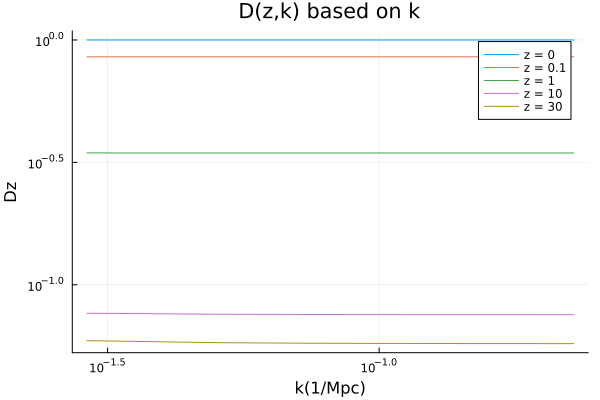

In [46]:
Zlabels = ["z = 0" "z = 0.1" "z = 1" "z = 10" "z = 30"]
K_norm = K_Arr .* H_nonlocal(0) ./ (3 * 10^5)
plot(K_norm, Dz_Arr, label = Zlabels, title = "D(z,k) based on k", ylabel = "Dz", xlabel = "k(1/Mpc)", xaxis = :log, yaxis = :log)